In [1]:
# Data tools
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# ML tools
import numpy as np
from sklearn.model_selection import train_test_split

## Currently working with training data

In [69]:
data = pd.read_csv('data_train.csv')
nrows, ncols = data.shape
print(f"Training dataset has {nrows} rows and {ncols} columns")

Training dataset has 159120 rows and 47 columns


In [6]:
data

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Filed Days,Issued Days,Issued or not,Days to issue
0,201301258756,8,otc alterations permit,01/25/2013,4793,003,1150,NaN,Thomas,Av,...,NaN,10.0,Bayview Hunters Point,94124.0,"(37.72595290725483, -122.38269220184294)",1294306175190,24,139.0,1,115.0
1,201609026729,8,otc alterations permit,09/02/2016,2100,016A,1962,NaN,35th,Av,...,NaN,4.0,Sunset/Parkside,94116.0,"(37.750461560474726, -122.49307858002412)",1436072125765,1340,1340.0,1,0.0
2,201305136761,8,otc alterations permit,05/13/2013,0235,022,50,NaN,California,St,...,NaN,3.0,Financial District/South Beach,94111.0,"(37.79404330589562, -122.39735981949903)",130453763364,132,133.0,1,1.0
3,201408133754,8,otc alterations permit,08/13/2014,0762,291,601,NaN,Van Ness,Av,...,NaN,5.0,Western Addition,94102.0,"(37.78138577762911, -122.42140632801414)",135217981233,589,590.0,1,1.0
4,201711154081,8,otc alterations permit,11/15/2017,6718,031,407,NaN,Chenery,St,...,NaN,8.0,Glen Park,94131.0,"(37.736118964517296, -122.42897285483104)",1487299211186,1779,1779.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159115,201801229205,8,otc alterations permit,01/22/2018,3607,015,3424,NaN,21st,St,...,NaN,8.0,Mission,94110.0,"(37.75697160777588, -122.42403311433307)",1494382161647,1847,1847.0,1,0.0
159116,201310179517,8,otc alterations permit,10/17/2013,4271,041,3053,NaN,25th,St,...,NaN,9.0,Mission,94110.0,"(37.75090800955743, -122.41094065650643)",1321114432767,289,301.0,1,12.0
159117,201712217169,8,otc alterations permit,12/21/2017,1676,017,838,NaN,34th,Av,...,NaN,1.0,Outer Richmond,94121.0,"(37.77326076248104, -122.49358551735072)",1491548109738,1815,1815.0,1,0.0
159118,201709259453,8,otc alterations permit,09/25/2017,0104,027,1522,NaN,Grant,Av,...,NaN,3.0,North Beach,94133.0,"(37.801074823955496, -122.40745767357204)",148086858996,1728,1728.0,1,0.0


In [18]:
pd.DataFrame.from_dict({'Column name': data.columns, 'Column datatype': data.dtypes, 
                        'Number of unique values': [data[col].nunique() for col in data.columns]})

,Column name,Column datatype,Number of unique values
Permit Number,Permit Number,object,147476
Permit Type,Permit Type,int64,8
Permit Type Definition,Permit Type Definition,object,8
Permit Creation Date,Permit Creation Date,object,1291
Block,Block,object,4872
Lot,Lot,object,1004
Street Number,Street Number,int64,5000
Street Number Suffix,Street Number Suffix,object,17
Street Name,Street Name,object,1685
Street Suffix,Street Suffix,object,21


## See what values variables take on

### Variables with a single value

They end up being booleans. Let's start with ```'Structural Notification'```.

In [70]:
# can't be called after the next cell is called
# print("Number of structural notification values that are not NA: ", end='')
# print(np.sum(data['Structural Notification'].notna()))
# print()

# print(data.loc[data['Structural Notification'].notna()]['Structural Notification'])
# print()
# print("Number of Structural Notification values that are Y: ", end='')
# print(np.sum(data['Structural Notification'] == 'Y'))

Number of structural notification values that are not NA: 5549

7         Y
17        Y
25        Y
64        Y
87        Y
         ..
158915    Y
159009    Y
159070    Y
159072    Y
159083    Y
Name: Structural Notification, Length: 5549, dtype: object

Number of Structural Notification values that are Y: 5549


In [72]:
# Replace structural notification with boolean
# can't be called multiple times:
# data['Structural Notification'] = data['Structural Notification'] == 'Y'
print(np.sum(data['Structural Notification']))

5549


Do the same with other variables that have 1 value

In [77]:
for col in ['Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Site Permit']:
    print(np.sum(data[col].notna()))
    print(data.loc[data[col].notna()][col])
    print(np.sum(data[col] == 'Y'))
    print()

25
3097      Y
10110     Y
14946     Y
17008     Y
23742     Y
26254     Y
29192     Y
42049     Y
54780     Y
62895     Y
68810     Y
70427     Y
79353     Y
80686     Y
100876    Y
104030    Y
104919    Y
108452    Y
119929    Y
119992    Y
125222    Y
131756    Y
140929    Y
151169    Y
158938    Y
Name: Voluntary Soft-Story Retrofit, dtype: object
25

15091
0         Y
9         Y
58        Y
61        Y
62        Y
         ..
159093    Y
159102    Y
159107    Y
159113    Y
159114    Y
Name: Fire Only Permit, Length: 15091, dtype: object
15091

4306
7         Y
17        Y
25        Y
133       Y
254       Y
         ..
158871    Y
158972    Y
159005    Y
159062    Y
159083    Y
Name: Site Permit, Length: 4306, dtype: object
4306



In [79]:
for col in ['Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Site Permit']:
#     data[col] = data[col] == 'Y'
    print(np.sum(data[col]))

25
15091
4306


All these variables can be treated as booleans. However, they all have very few values that are true, so they are individually unlikely to be helpful. 

The last apparent boolean is TIDF compliance.

In [83]:
print(np.sum(data['TIDF Compliance'].notna()))
print(data.loc[data['TIDF Compliance'].notna()]['TIDF Compliance'])

2
87509     Y
140005    P
Name: TIDF Compliance, dtype: object


This is enough of an outlier to remove the column.

In [86]:
data = data.drop(columns='TIDF Compliance')

### Categorical data

Start with ```'Permit Type '``` and ```'Permit Type Definition'```

(8, 143102)
(3, 11727)
(4, 2305)
(2, 743)
(6, 495)
(7, 394)
(1, 284)
(5, 70)


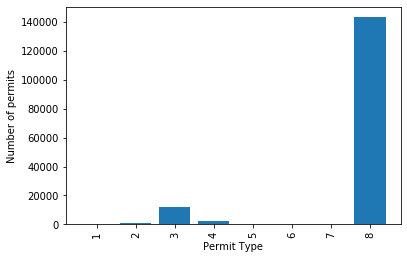

In [89]:
permit_counter = Counter(data['Permit Type'])

plt.xticks(rotation='vertical')
plt.xlabel("Permit Type")
plt.ylabel("Number of permits")
plt.bar([ptype for ptype,_ in permit_counter.items()], [count for _,count in permit_counter.items()]);

for type_count in permit_counter.items():
    print(type_count)

Permit type 8 dominates, with significant amounts from types 3 and 4, but the others aren't quite outliers.

Next, make sure ```'Permit Type Definition'``` matches ```'Permit Type'``` exactly.

In [103]:
permit_type_def_counter = Counter(data['Permit Type'].values.astype('str') + data['Permit Type Definition'])

for type_count in permit_type_def_counter.items():
    print(type_count)

('8otc alterations permit', 143102)
('3additions alterations or repairs', 11727)
('4sign - erect', 2305)
('2new construction wood frame', 743)
('6demolitions', 495)
('7wall or painted sign', 394)
('1new construction', 284)
('5grade or quarry or fill or excavate', 70)


Remove permit type definition.

In [104]:
data = data.drop(columns='Permit Type Definition')

Similar things for ```'Existing Construction Type'```, ```'Existing Construction Type Description'```,
```'Proposed Construction Type'``` and ```'Proposed Construction Type Description'```.

In [108]:
print(sum(data['Existing Construction Type'].isna()))


34604


(1.0, 22562)
(5.0, 90694)
(2.0, 3252)
(3.0, 7705)
(4.0, 303)


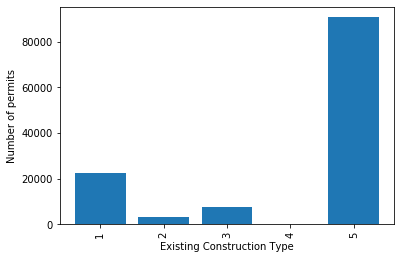

In [111]:
counters = {}
counters['Existing Construction Type'] = Counter(data.loc[data[
    'Existing Construction Type'].notna()]['Existing Construction Type'])

plt.xticks(rotation='vertical')
plt.xlabel("Existing Construction Type")
plt.ylabel("Number of permits")
plt.bar([ptype for ptype,_ in counters['Existing Construction Type'].items()], 
        [count for _,count in counters['Existing Construction Type'].items()]);

for type_count in counters['Existing Construction Type'].items():
    print(type_count)